# Problem 4

### a) Random input, compare variance

In [119]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [120]:
# Function for Method 2
def method_2(line, m):
    k2_est = 0
    for item in line:
        num = random.random()
        if num < 1 / m:  # check with probability 1/m
            k2_est += item  # +item acts as indicator variable instead of actually checking
    return k2_est * m  # scale up by m to get estimate of total number of 1s

# Function for Method 4
def method_4(line, m):
    k4_est = 0
    blocks = line.reshape(-1, m)  # reshape the line into blocks of size m
    for block in blocks:
        choice = random.choice(block)  # choose one item from the block at random
        k4_est += choice  # again acts as indicator variable
    return k4_est * m  # scale up by m to get estimate of total number of 1s

In [121]:
n = 100
m = 10
k_values = np.arange(15, 26)
mc_runs = 2000
k2_ests = {k: [] for k in k_values}
k4_ests = {k: [] for k in k_values}

for k in k_values:
    for run in range(mc_runs):
        line = np.zeros(n)
        line[:k] = 1 # put in k faulty items

        np.random.shuffle(line) # randomize order (same for both methods)


        # METHOD 2

        k2_ests[k].append(method_2(line, m))
        #print(f"k2 estimate for k={k}: {k2_ests[k][-1]}")

        # METHOD 4

        k4_ests[k].append(method_4(line, m))
        #print(f"k4 estimate for k={k}: {k4_ests[k][-1]}")

### ** Claude did all plotting throughout, after calculating all relevant values on own **

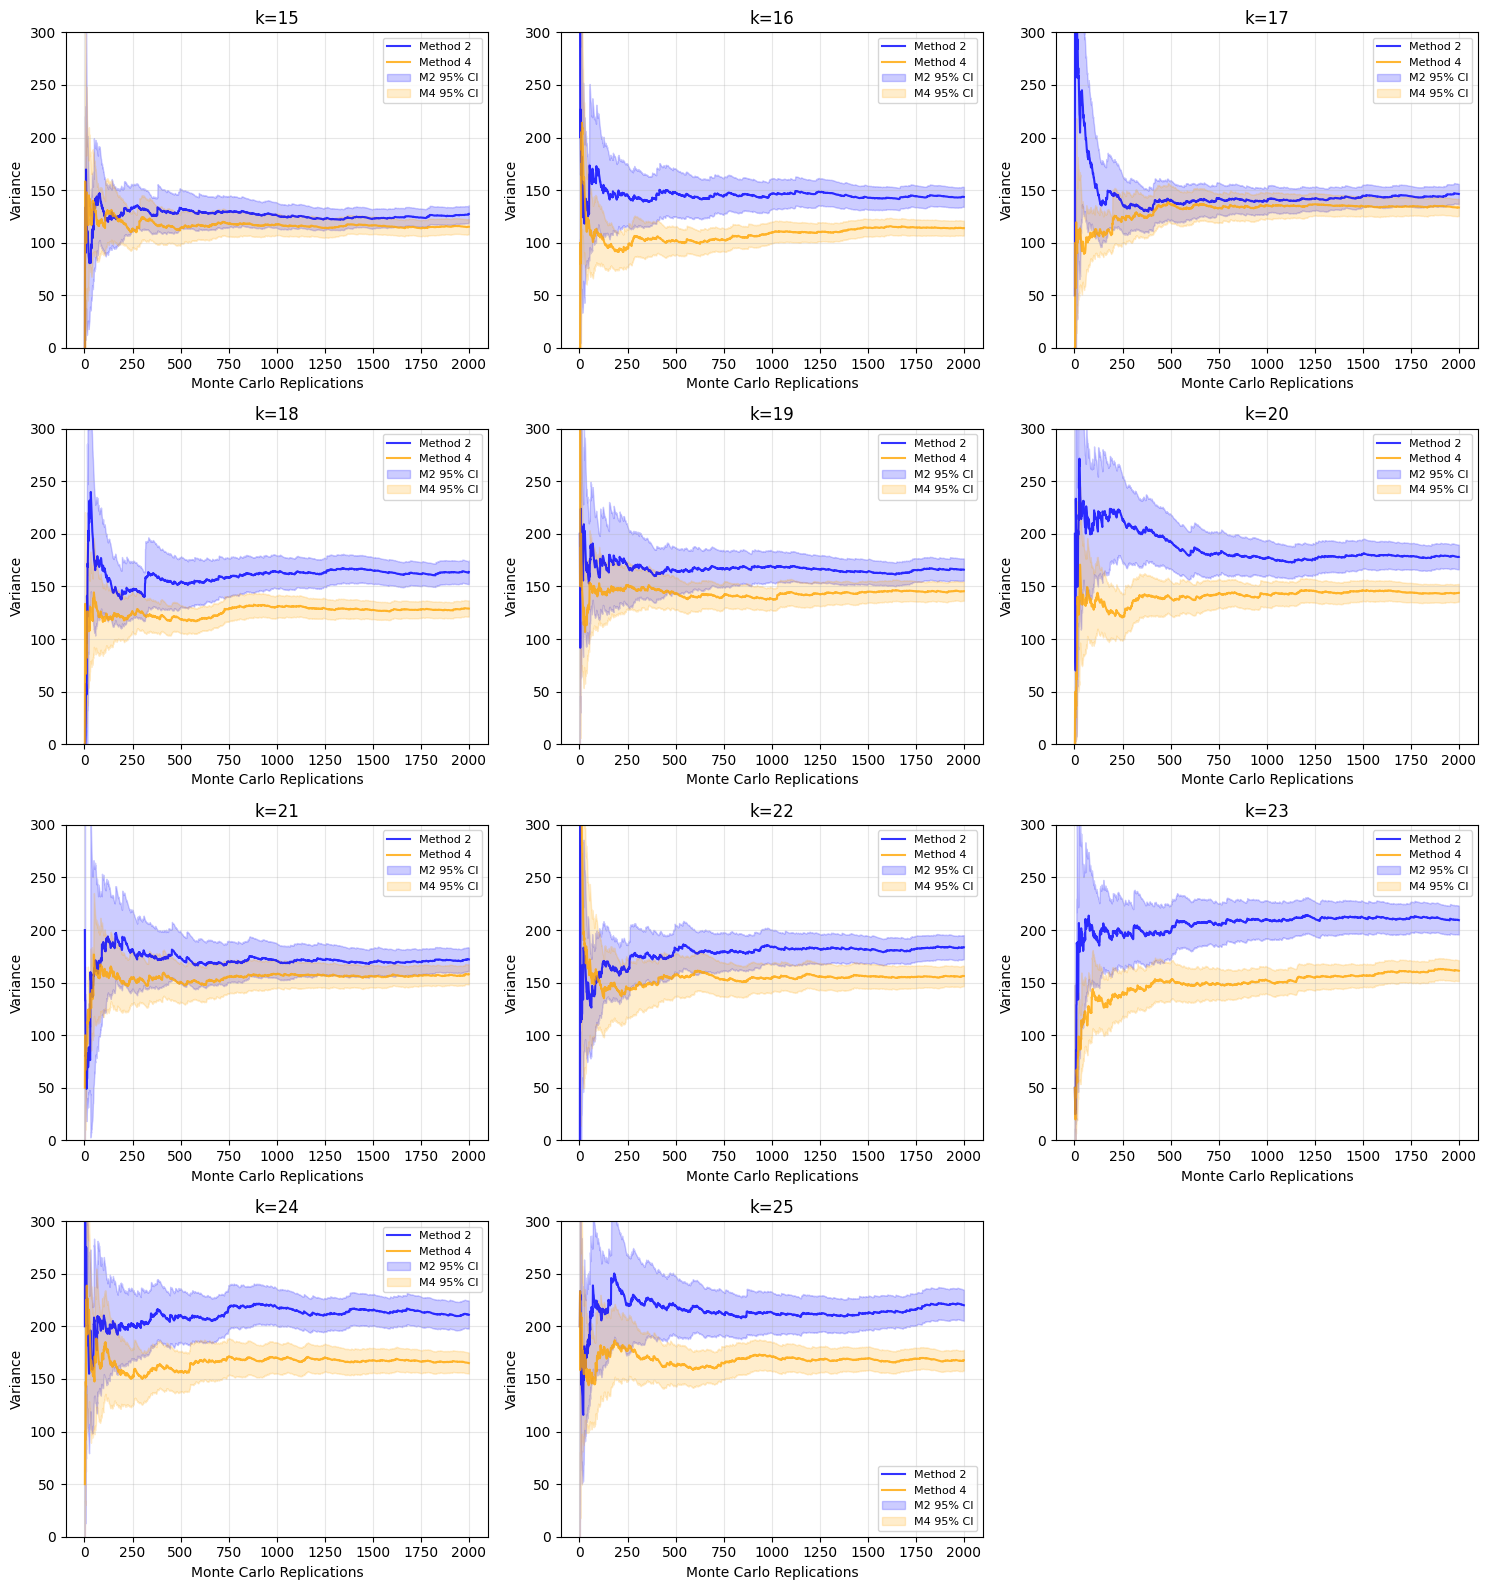

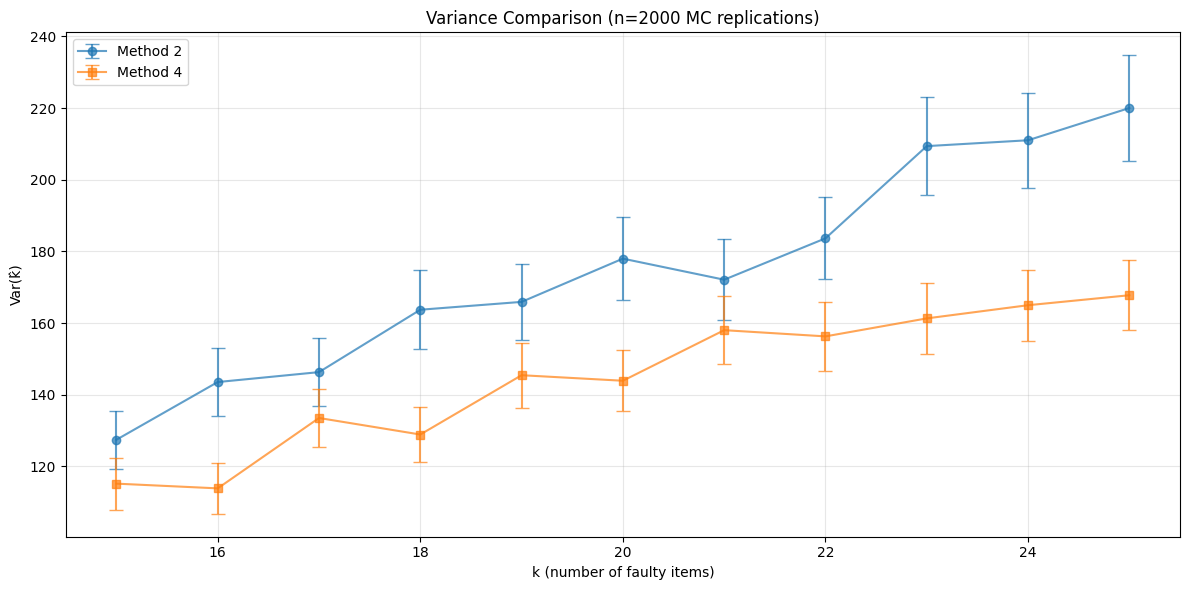


Variance Comparison:
k     Var(k̂₂)     95% CI               Var(k̂₄)     95% CI               Ratio       
------------------------------------------------------------------------------------------
15    127.46       ±8.15                115.21       ±7.27                1.11        
16    143.56       ±9.52                113.89       ±7.10                1.26        
17    146.32       ±9.58                133.53       ±8.17                1.10        
18    163.73       ±10.98               128.92       ±7.67                1.27        
19    165.92       ±10.57               145.46       ±9.09                1.14        
20    177.99       ±11.67               143.92       ±8.45                1.24        
21    172.11       ±11.25               158.03       ±9.45                1.09        
22    183.65       ±11.42               156.30       ±9.70                1.18        
23    209.38       ±13.70               161.32       ±9.94                1.30        
24    211.02     

In [94]:
# Calculate final variances and CIs
k2_vars = [np.var(k2_ests[k], ddof=1) for k in k_values]
k4_vars = [np.var(k4_ests[k], ddof=1) for k in k_values]

# Calculate standard errors for the final variance estimates (for plot 2)
k2_ci_plot2 = []
k4_ci_plot2 = []

for k in k_values:
    samples_k2 = k2_ests[k]
    samples_k4 = k4_ests[k]
    
    mean_k2 = np.mean(samples_k2)
    mean_k4 = np.mean(samples_k4)
    
    # Squared deviations
    sq_dev_k2 = [(x - mean_k2)**2 for x in samples_k2]
    sq_dev_k4 = [(x - mean_k4)**2 for x in samples_k4]
    
    # Variance of the squared deviations
    var_of_sq_dev_k2 = np.var(sq_dev_k2, ddof=1)
    var_of_sq_dev_k4 = np.var(sq_dev_k4, ddof=1)
    
    # Standard error of variance estimate
    se_var_k2 = np.sqrt(var_of_sq_dev_k2 / mc_runs)
    se_var_k4 = np.sqrt(var_of_sq_dev_k4 / mc_runs)
    
    # 95% CI
    k2_ci_plot2.append(1.96 * se_var_k2)
    k4_ci_plot2.append(1.96 * se_var_k4)

k2_ci_plot2 = np.array(k2_ci_plot2)
k4_ci_plot2 = np.array(k4_ci_plot2)

# PLOT 1: Individual plots with confidence intervals at each iteration
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    ax = axes[idx]
    mc_reps = np.arange(2, mc_runs + 1)
    
    # Cumulative variance estimates at each iteration
    k2_cum_var = []
    k4_cum_var = []
    k2_cum_ci_lower = []
    k2_cum_ci_upper = []
    k4_cum_ci_lower = []
    k4_cum_ci_upper = []
    
    for i in range(2, mc_runs + 1):
        # Get samples up to iteration i
        samples_k2 = k2_ests[k][:i]
        samples_k4 = k4_ests[k][:i]
        
        # Current variance estimates (our θ̂ᵢ)
        var_k2 = np.var(samples_k2, ddof=1)
        var_k4 = np.var(samples_k4, ddof=1)
        k2_cum_var.append(var_k2)
        k4_cum_var.append(var_k4)
        
        # For CI, we need the standard error of the variance estimate
        mean_k2 = np.mean(samples_k2)
        mean_k4 = np.mean(samples_k4)
        
        # Squared deviations
        sq_dev_k2 = [(x - mean_k2)**2 for x in samples_k2]
        sq_dev_k4 = [(x - mean_k4)**2 for x in samples_k4]
        
        # Variance of the squared deviations
        var_of_sq_dev_k2 = np.var(sq_dev_k2, ddof=1) if i > 2 else 0
        var_of_sq_dev_k4 = np.var(sq_dev_k4, ddof=1) if i > 2 else 0
        
        # Standard error of variance estimate
        se_var_k2 = np.sqrt(var_of_sq_dev_k2 / i) if i > 2 else var_k2
        se_var_k4 = np.sqrt(var_of_sq_dev_k4 / i) if i > 2 else var_k4
        
        # CI bounds: variance ± 1.96 * SE(variance)
        k2_cum_ci_lower.append(max(0, var_k2 - 1.96 * se_var_k2))
        k2_cum_ci_upper.append(var_k2 + 1.96 * se_var_k2)
        k4_cum_ci_lower.append(max(0, var_k4 - 1.96 * se_var_k4))
        k4_cum_ci_upper.append(var_k4 + 1.96 * se_var_k4)
    
    # Plot variance estimates
    ax.plot(mc_reps, k2_cum_var, label='Method 2', alpha=0.8, color='blue')
    ax.plot(mc_reps, k4_cum_var, label='Method 4', alpha=0.8, color='orange')
    
    # Add confidence bands
    ax.fill_between(mc_reps, k2_cum_ci_lower, k2_cum_ci_upper, 
                     alpha=0.2, color='blue', label='M2 95% CI')
    ax.fill_between(mc_reps, k4_cum_ci_lower, k4_cum_ci_upper, 
                     alpha=0.2, color='orange', label='M4 95% CI')
    
    ax.set_title(f'k={k}')
    ax.set_xlabel('Monte Carlo Replications')
    ax.set_ylabel('Variance')
    ax.set_ylim(0, 300)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Hide the last subplot
axes[11].axis('off')

plt.tight_layout()
plt.show()

# PLOT 2: Single plot with confidence intervals
plt.figure(figsize=(12, 6))

plt.errorbar(k_values, k2_vars, yerr=k2_ci_plot2, marker='o', label='Method 2', 
             capsize=5, alpha=0.7, markersize=6)
plt.errorbar(k_values, k4_vars, yerr=k4_ci_plot2, marker='s', label='Method 4', 
             capsize=5, alpha=0.7, markersize=6)

plt.xlabel('k (number of faulty items)')
plt.ylabel('Var(k̂)')
plt.title(f'Variance Comparison (n={mc_runs} MC replications)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nVariance Comparison:")
print(f"{'k':<5} {'Var(k̂₂)':<12} {'95% CI':<20} {'Var(k̂₄)':<12} {'95% CI':<20} {'Ratio':<12}")
print("-" * 90)
for i, k in enumerate(k_values):
    ratio = k2_vars[i] / k4_vars[i] if k4_vars[i] > 0 else float('inf')
    ci2_str = f"±{k2_ci_plot2[i]:.2f}"
    ci4_str = f"±{k4_ci_plot2[i]:.2f}"
    print(f"{k:<5} {k2_vars[i]:<12.2f} {ci2_str:<20} {k4_vars[i]:<12.2f} {ci4_str:<20} {ratio:<12.2f}")

Method 4 has lower variance across the board, regardless of the value of $k$. As $k$ increases, the variances of both methods increases approximately linearly. This makes sense, since the estimates are all multiples of $m$, and the more faults inspected, the higher multiple of $m$ will be reported.

### b) Worst case, compare variance

In [95]:
K = 20
l_values = [2, 4, 5, 10]

k2_ests_b = {l: [] for l in l_values}
k4_ests_b = {l: [] for l in l_values}

for l in l_values:
    for run in range(mc_runs):
        blocks2 = np.zeros((n//m, m))
        blocks2[:l, :(K//l)] = 1 # put in K=20 faulty items in l blocks
        np.random.shuffle(blocks2) # shuffle order of blocks (same for both methods)

        line2 = blocks2.flatten() # flatten back to line format


        # METHOD 2

        k2_ests_b[l].append(method_2(line2, m))
        #print(f"k2 estimate for k={k}: {k2_ests[k][-1]}")


        # METHOD 4

        k4_ests_b[l].append(method_4(line2, m))
        #print(f"k4 estimate for k={k}: {k4_ests[k][-1]}")

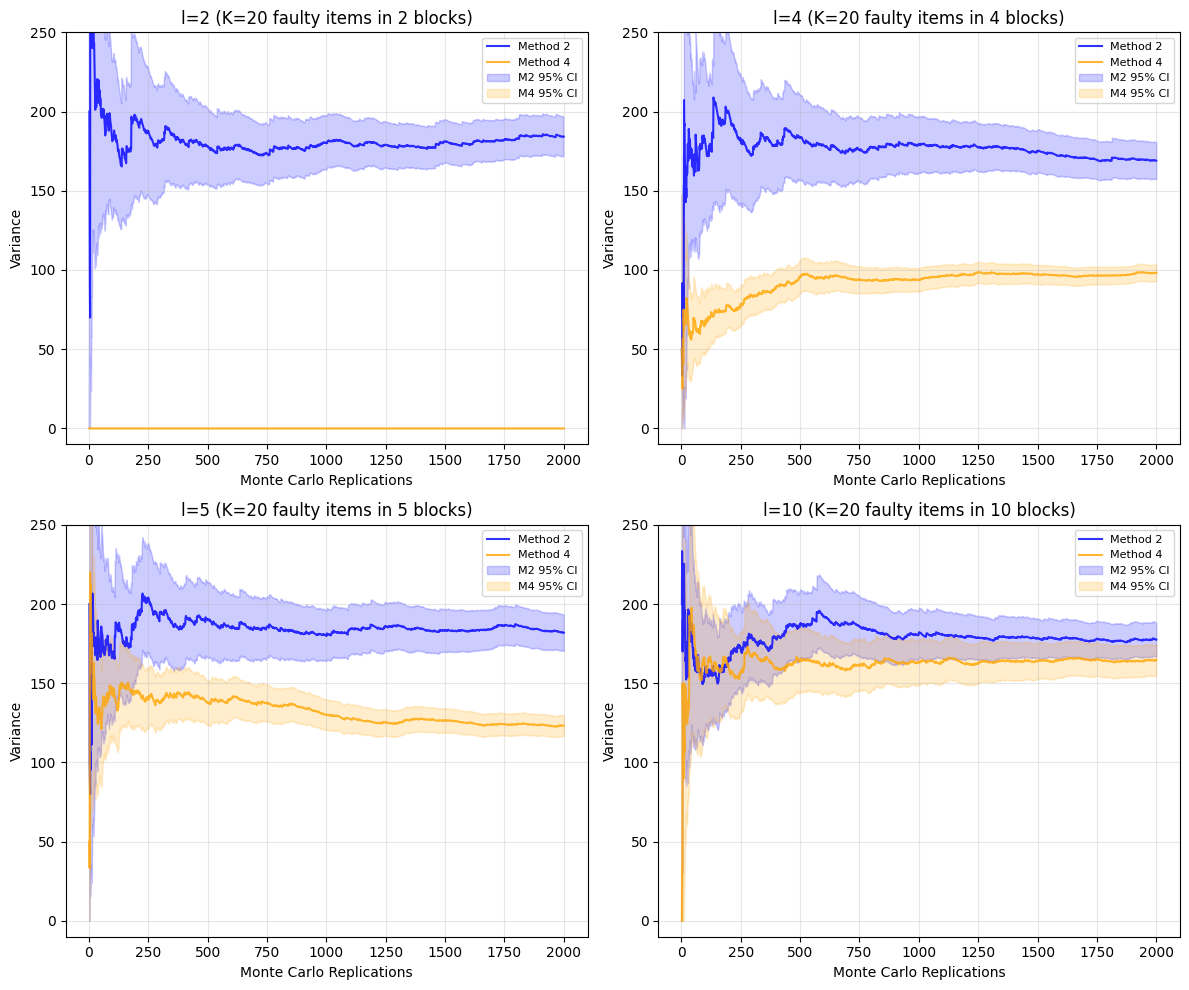

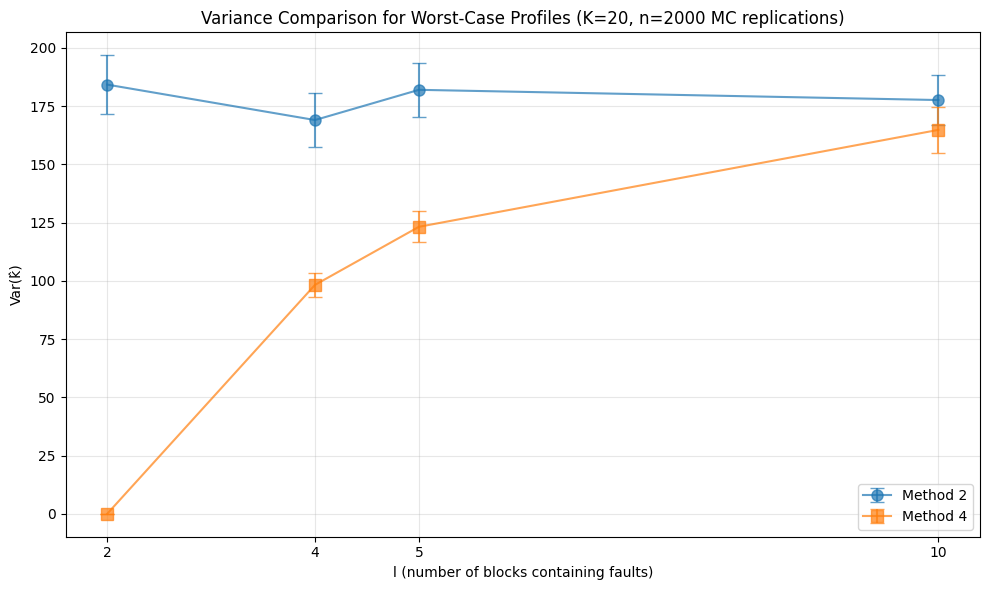


Variance Comparison (Worst-Case Profiles):
l     Var(k̂₂)     95% CI               Var(k̂₄)     95% CI               Ratio       
------------------------------------------------------------------------------------------
2     184.19       ±12.60               0.00         ±0.00                inf         
4     168.98       ±11.63               98.25        ±5.27                1.72        
5     181.95       ±11.54               123.17       ±6.65                1.48        
10    177.57       ±10.80               164.77       ±9.86                1.08        


In [96]:
# Calculate final variances and CIs
k2_variances_b = [np.var(k2_ests_b[l], ddof=1) for l in l_values]
k4_variances_b = [np.var(k4_ests_b[l], ddof=1) for l in l_values]

# Calculate standard errors for the final variance estimates (for plot 2)
k2_ci_b_plot2 = []
k4_ci_b_plot2 = []

for l in l_values:
    samples_k2 = k2_ests_b[l]
    samples_k4 = k4_ests_b[l]
    
    mean_k2 = np.mean(samples_k2)
    mean_k4 = np.mean(samples_k4)
    
    # Squared deviations
    sq_dev_k2 = [(x - mean_k2)**2 for x in samples_k2]
    sq_dev_k4 = [(x - mean_k4)**2 for x in samples_k4]
    
    # Variance of the squared deviations
    var_of_sq_dev_k2 = np.var(sq_dev_k2, ddof=1)
    var_of_sq_dev_k4 = np.var(sq_dev_k4, ddof=1)
    
    # Standard error of variance estimate
    se_var_k2 = np.sqrt(var_of_sq_dev_k2 / mc_runs)
    se_var_k4 = np.sqrt(var_of_sq_dev_k4 / mc_runs)
    
    # 95% CI
    k2_ci_b_plot2.append(1.96 * se_var_k2)
    k4_ci_b_plot2.append(1.96 * se_var_k4)

k2_ci_b_plot2 = np.array(k2_ci_b_plot2)
k4_ci_b_plot2 = np.array(k4_ci_b_plot2)

# PLOT 1: Individual plots with confidence intervals at each iteration
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, l in enumerate(l_values):
    ax = axes[idx]
    mc_reps = np.arange(2, mc_runs + 1)
    
    # Cumulative variance estimates at each iteration
    k2_cum_var = []
    k4_cum_var = []
    k2_cum_ci_lower = []
    k2_cum_ci_upper = []
    k4_cum_ci_lower = []
    k4_cum_ci_upper = []
    
    for i in range(2, mc_runs + 1):
        # Get samples up to iteration i
        samples_k2 = k2_ests_b[l][:i]
        samples_k4 = k4_ests_b[l][:i]
        
        # Current variance estimates
        var_k2 = np.var(samples_k2, ddof=1)
        var_k4 = np.var(samples_k4, ddof=1)
        k2_cum_var.append(var_k2)
        k4_cum_var.append(var_k4)
        
        # Calculate SE of variance estimate
        mean_k2 = np.mean(samples_k2)
        mean_k4 = np.mean(samples_k4)
        
        # Squared deviations
        sq_dev_k2 = [(x - mean_k2)**2 for x in samples_k2]
        sq_dev_k4 = [(x - mean_k4)**2 for x in samples_k4]
        
        # Variance of the squared deviations
        var_of_sq_dev_k2 = np.var(sq_dev_k2, ddof=1) if i > 2 else 0
        var_of_sq_dev_k4 = np.var(sq_dev_k4, ddof=1) if i > 2 else 0
        
        # Standard error of variance estimate
        se_var_k2 = np.sqrt(var_of_sq_dev_k2 / i) if i > 2 else var_k2
        se_var_k4 = np.sqrt(var_of_sq_dev_k4 / i) if i > 2 else var_k4
        
        # CI bounds
        k2_cum_ci_lower.append(max(0, var_k2 - 1.96 * se_var_k2))
        k2_cum_ci_upper.append(var_k2 + 1.96 * se_var_k2)
        k4_cum_ci_lower.append(max(0, var_k4 - 1.96 * se_var_k4))
        k4_cum_ci_upper.append(var_k4 + 1.96 * se_var_k4)
    
    # Plot variance estimates
    ax.plot(mc_reps, k2_cum_var, label='Method 2', alpha=0.8, color='blue')
    ax.plot(mc_reps, k4_cum_var, label='Method 4', alpha=0.8, color='orange')
    
    # Add confidence bands
    ax.fill_between(mc_reps, k2_cum_ci_lower, k2_cum_ci_upper, 
                     alpha=0.2, color='blue', label='M2 95% CI')
    ax.fill_between(mc_reps, k4_cum_ci_lower, k4_cum_ci_upper, 
                     alpha=0.2, color='orange', label='M4 95% CI')
    
    ax.set_title(f'l={l} (K={K} faulty items in {l} blocks)')
    ax.set_xlabel('Monte Carlo Replications')
    ax.set_ylabel('Variance')
    ax.set_ylim(-10, 250)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PLOT 2: Single plot with confidence intervals
plt.figure(figsize=(10, 6))

plt.errorbar(l_values, k2_variances_b, yerr=k2_ci_b_plot2, marker='o', label='Method 2', 
             capsize=5, alpha=0.7, markersize=8)
plt.errorbar(l_values, k4_variances_b, yerr=k4_ci_b_plot2, marker='s', label='Method 4', 
             capsize=5, alpha=0.7, markersize=8)

plt.xlabel('l (number of blocks containing faults)')
plt.ylabel('Var(k̂)')
plt.title(f'Variance Comparison for Worst-Case Profiles (K={K}, n={mc_runs} MC replications)')
plt.xticks(l_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nVariance Comparison (Worst-Case Profiles):")
print(f"{'l':<5} {'Var(k̂₂)':<12} {'95% CI':<20} {'Var(k̂₄)':<12} {'95% CI':<20} {'Ratio':<12}")
print("-" * 90)
for i, l in enumerate(l_values):
    ratio = k2_variances_b[i] / k4_variances_b[i] if k4_variances_b[i] > 0 else float('inf')
    ci2_str = f"±{k2_ci_b_plot2[i]:.2f}"
    ci4_str = f"±{k4_ci_b_plot2[i]:.2f}"
    print(f"{l:<5} {k2_variances_b[i]:<12.2f} {ci2_str:<20} {k4_variances_b[i]:<12.2f} {ci4_str:<20} {ratio:<12.2f}")

Method 4 is better for all values of $\ell$ presented here. In fact, for $\ell=2$, method 4 has 0 variance, since each block with faults contains only faults, so the one inspection will find a fault every time. However, as $\ell$ increases, moving towards the worst case input for method 4, its relative performance decreases significantly, because it can no longer rely on faults potentially being clustered anymore.

### c) Random input, compare detection error

In [105]:
tau = 20
beta_values = [0.05, 0.1, 0.15, 0.2, 0.25]

R2 = {beta: [] for beta in beta_values} # dictionary to store results for each beta value
R4 = {beta: [] for beta in beta_values}


# Store individual binary error indicators for CI calculation
error_m2 = {beta: [] for beta in beta_values}
error_m4 = {beta: [] for beta in beta_values}

for beta in beta_values:
    FN2 = 0
    FP2 = 0
    FN4 = 0
    FP4 = 0
    for run in range(1, mc_runs + 1): # start from 1 to avoid division by zero when calculating probabilities
        random_k = np.random.choice(k_values) # randomly select a k value from the range of 15 to 25                CHANGE??
        line3 = np.zeros(n)
        line3[:random_k] = 1 # put in random_k faulty items
        np.random.shuffle(line3) # randomize order (same for both methods)

        # Track if THIS run had an error (binary: 0 or 1)
        error_this_run_m2 = 0
        error_this_run_m4 = 0

        # METHOD 2
        k2_est_c = method_2(line3, m)
        if k2_est_c <= tau and random_k >= (1 + beta) * tau:
            FN2 += 1
            error_this_run_m2 = 1
        if k2_est_c > tau and random_k <= (1 - beta) * tau:
            FP2 += 1
            error_this_run_m2 = 1
        
        # METHOD 4
        k4_est_c = method_4(line3, m)
        if k4_est_c <= tau and random_k >= (1 + beta) * tau:
            FN4 += 1
            error_this_run_m4 = 1
        if k4_est_c > tau and random_k <= (1 - beta) * tau:
            FP4 += 1
            error_this_run_m4 = 1
        
        # Store individual binary outcome
        error_m2[beta].append(error_this_run_m2)
        error_m4[beta].append(error_this_run_m4)
        
        # Store cumulative average (for convergence plot)
        FN2_prob = FN2 / run
        FP2_prob = FP2 / run
        R2[beta].append(0.5 * (FN2_prob + FP2_prob))
        
        FN4_prob = FN4 / run
        FP4_prob = FP4 / run
        R4[beta].append(0.5 * (FN4_prob + FP4_prob))

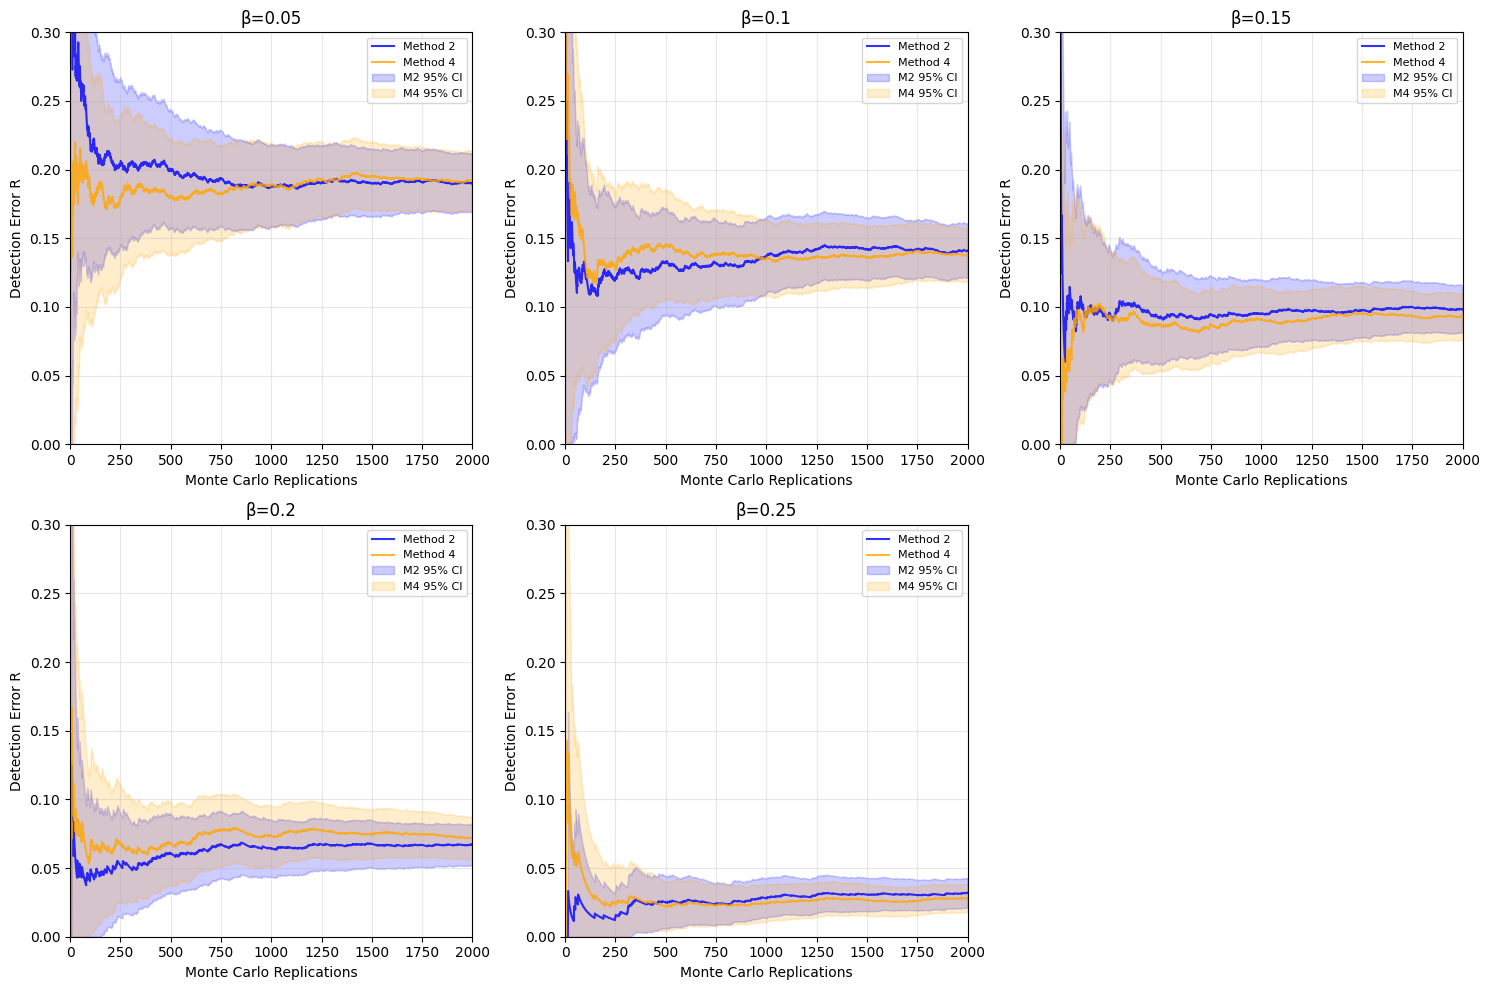

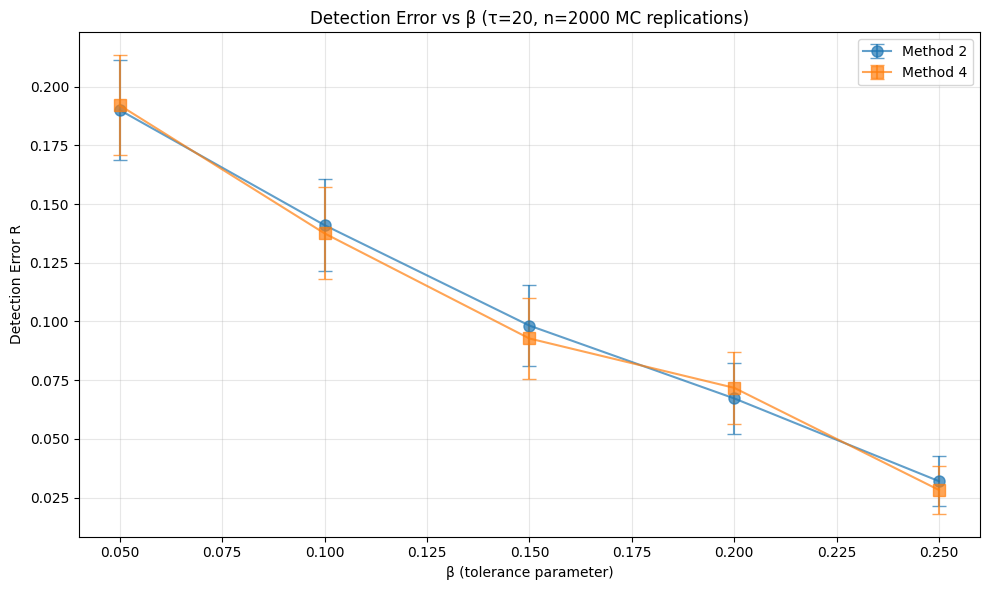


Detection Error Comparison:
β        R₂           95% CI               R₄           95% CI               Difference  
-----------------------------------------------------------------------------------------------
0.05     0.1900       ±0.0213              0.1920       ±0.0213              -0.0020     
0.1      0.1410       ±0.0197              0.1375       ±0.0196              0.0035      
0.15     0.0983       ±0.0174              0.0927       ±0.0170              0.0055      
0.2      0.0673       ±0.0150              0.0717       ±0.0154              -0.0045     
0.25     0.0320       ±0.0107              0.0283       ±0.0101              0.0037      


In [106]:
# Use the final cumulative values (already calculated correctly)
R2_final = [R2[beta][-1] for beta in beta_values]
R4_final = [R4[beta][-1] for beta in beta_values]

# Calculate standard errors using binary indicators (for CI only)
R2_ci_plot2 = []
R4_ci_plot2 = []

for beta in beta_values:
    # Empirical variance of binary indicators
    empirical_var_m2 = np.var(error_m2[beta], ddof=1)
    empirical_var_m4 = np.var(error_m4[beta], ddof=1)
    
    # Standard error: S_n / sqrt(n)
    se_m2 = np.sqrt(empirical_var_m2 / mc_runs)
    se_m4 = np.sqrt(empirical_var_m4 / mc_runs)
    
    # 95% CI
    R2_ci_plot2.append(1.96 * se_m2)
    R4_ci_plot2.append(1.96 * se_m4)

R2_ci_plot2 = np.array(R2_ci_plot2)
R4_ci_plot2 = np.array(R4_ci_plot2)

# PLOT 1: Individual plots with confidence intervals at each iteration
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, beta in enumerate(beta_values):
    ax = axes[idx]
    mc_reps = np.arange(1, mc_runs + 1)
    
    # Use the existing R2 and R4 cumulative values
    R2_cum = R2[beta]
    R4_cum = R4[beta]
    
    # Calculate CI at each iteration
    R2_cum_ci_lower = []
    R2_cum_ci_upper = []
    R4_cum_ci_lower = []
    R4_cum_ci_upper = []
    
    for i in range(1, mc_runs + 1):
        # Use cumulative values already calculated
        r2_current = R2[beta][i-1]  # i-1 because list is 0-indexed
        r4_current = R4[beta][i-1]
        
        # Calculate SE at this iteration using binary indicators
        if i > 1:
            empirical_var_m2 = np.var(error_m2[beta][:i], ddof=1)
            empirical_var_m4 = np.var(error_m4[beta][:i], ddof=1)
            
            se_m2 = np.sqrt(empirical_var_m2 / i)
            se_m4 = np.sqrt(empirical_var_m4 / i)
        else:
            se_m2 = 0
            se_m4 = 0
        
        # CI bounds
        R2_cum_ci_lower.append(max(0, r2_current - 1.96 * se_m2))
        R2_cum_ci_upper.append(min(1, r2_current + 1.96 * se_m2))
        R4_cum_ci_lower.append(max(0, r4_current - 1.96 * se_m4))
        R4_cum_ci_upper.append(min(1, r4_current + 1.96 * se_m4))
    
    # Plot detection error estimates (using original values)
    ax.plot(mc_reps, R2_cum, label='Method 2', alpha=0.8, color='blue')
    ax.plot(mc_reps, R4_cum, label='Method 4', alpha=0.8, color='orange')
    
    # Add confidence bands
    ax.fill_between(mc_reps, R2_cum_ci_lower, R2_cum_ci_upper, 
                     alpha=0.2, color='blue', label='M2 95% CI')
    ax.fill_between(mc_reps, R4_cum_ci_lower, R4_cum_ci_upper, 
                     alpha=0.2, color='orange', label='M4 95% CI')
    
    ax.set_title(f'β={beta}')
    ax.set_xlabel('Monte Carlo Replications')
    ax.set_ylabel('Detection Error R')
    ax.set_xlim(0, mc_runs)
    ax.set_ylim(0, 0.3)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Hide the last subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# PLOT 2: Final estimates vs β with confidence intervals
plt.figure(figsize=(10, 6))

plt.errorbar(beta_values, R2_final, yerr=R2_ci_plot2, marker='o', label='Method 2', 
             capsize=5, alpha=0.7, markersize=8)
plt.errorbar(beta_values, R4_final, yerr=R4_ci_plot2, marker='s', label='Method 4', 
             capsize=5, alpha=0.7, markersize=8)

plt.xlabel('β (tolerance parameter)')
plt.ylabel('Detection Error R')
plt.title(f'Detection Error vs β (τ={tau}, n={mc_runs} MC replications)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nDetection Error Comparison:")
print(f"{'β':<8} {'R₂':<12} {'95% CI':<20} {'R₄':<12} {'95% CI':<20} {'Difference':<12}")
print("-" * 95)
for i, beta in enumerate(beta_values):
    diff = R2_final[i] - R4_final[i]
    ci2_str = f"±{R2_ci_plot2[i]:.4f}"
    ci4_str = f"±{R4_ci_plot2[i]:.4f}"
    print(f"{beta:<8} {R2_final[i]:<12.4f} {ci2_str:<20} {R4_final[i]:<12.4f} {ci4_str:<20} {diff:<12.4f}")

The two methods compare very similarly when it comes to detection error as we've defined. Both have the same behavior, decreasing linearly as the value of $\beta$ increases. This makes complete sense because the larger $\beta$ is, the more tolerance you have for accepting values in a wider range of outputs. The larger the range, the more likely you are to be inside of it.

### d) Random input, compare detection error

In [124]:
R2_d = {l: [] for l in l_values} # dictionary to store results for each l value
R4_d = {l: [] for l in l_values}
beta_d = 0.1

error_m2_d = {l: [] for l in l_values}
error_m4_d = {l: [] for l in l_values}


for l in l_values:
    FN2_d = 0
    FP2_d = 0
    FN4_d = 0
    FP4_d = 0
    for run in range(1, mc_runs + 1): # start from 1 to avoid division by zero when calculating probabilities
        random_k = np.random.choice(k_values) # randomly select a k value from the range of 15 to 25                CHANGE??
        blocks4 = np.zeros((n//m, m))

        if random_k > 0:
            # Distribute random_k faults across ℓ blocks as evenly as possible
            faults_per_block = random_k // l
            extra_faults = random_k % l
            
            for i in range(l):
                if i < extra_faults:
                    blocks4[i, :min(faults_per_block + 1, m)] = 1
                else:
                    blocks4[i, :min(faults_per_block, m)] = 1
                    
        np.random.shuffle(blocks4) # shuffle order of blocks (same for both methods)

        line4 = blocks4.flatten() # flatten back to line format


        error_this_run_m2 = 0
        error_this_run_m4 = 0


        # METHOD 2
        k2_est_d = method_2(line4, m)
        if k2_est_d <= tau and random_k >= (1 + beta_d) * tau:
            FN2_d += 1 # add one and at end divide by mc_runs to get FN probability
            error_this_run_m2 = 1

        if k2_est_d > tau and random_k <= (1 - beta_d) * tau:
            FP2_d += 1
            error_this_run_m2 = 1


        # METHOD 4
        k4_est_d = method_4(line4, m)
        if k4_est_d <= tau and random_k >= (1 + beta_d) * tau:
            FN4_d += 1
            error_this_run_m4 = 1
        if k4_est_d > tau and random_k <= (1 - beta_d) * tau:
            FP4_d += 1
            error_this_run_m4 = 1


        error_m2_d[l].append(error_this_run_m2)
        error_m4_d[l].append(error_this_run_m4)

        FN2_prob = FN2_d / run
        FP2_prob = FP2_d / run
        R2_d[l].append(0.5 * (FN2_prob + FP2_prob)) # average of FN and FP probabilities

        FN4_prob = FN4_d / run
        FP4_prob = FP4_d / run
        R4_d[l].append(0.5 * (FN4_prob + FP4_prob))

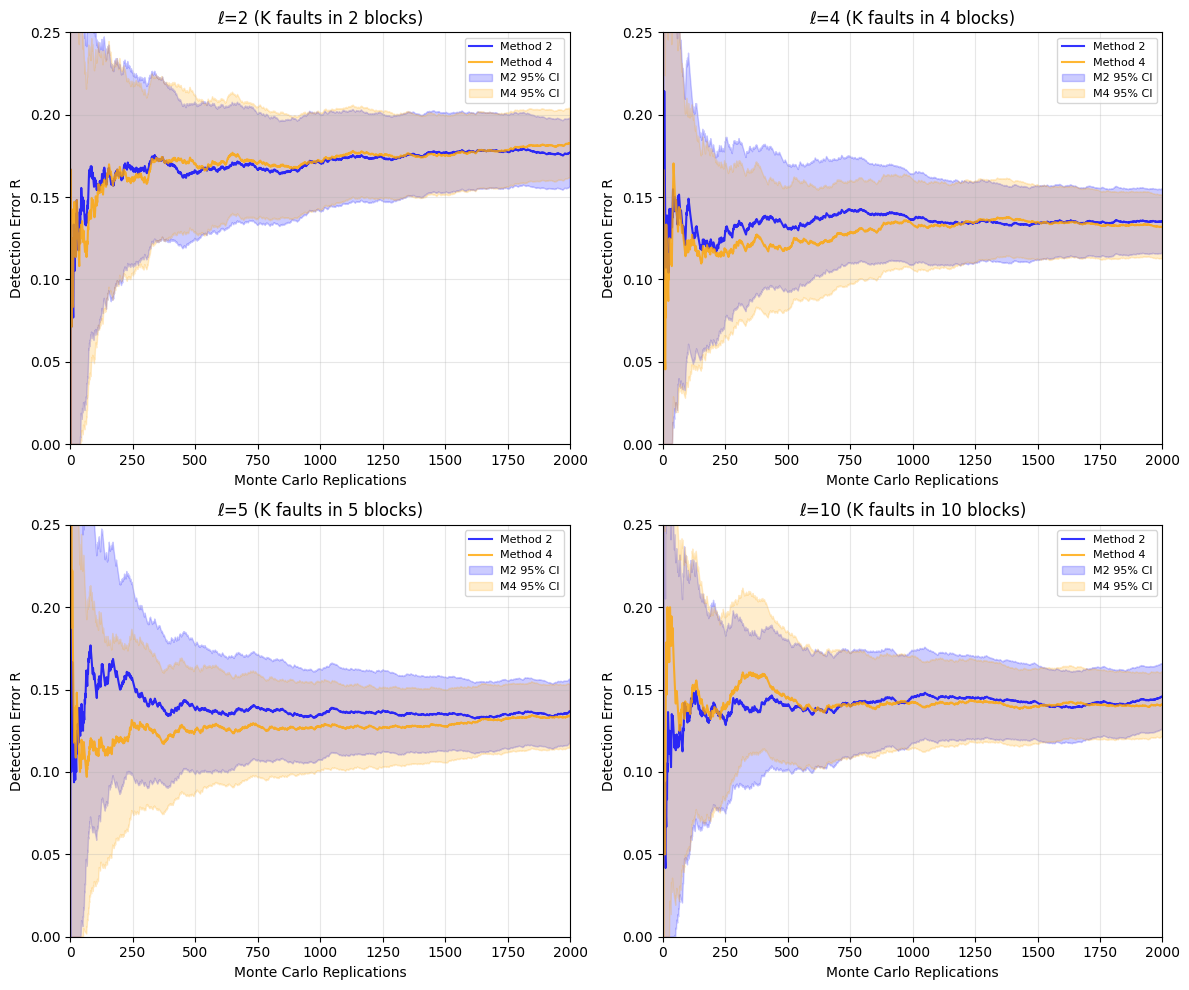

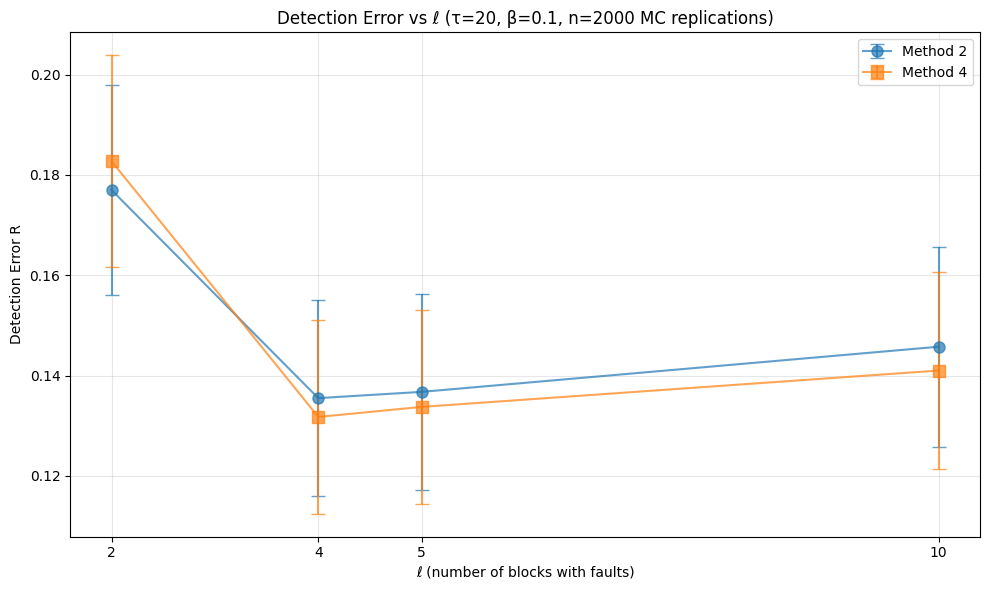


Detection Error Comparison (Worst-Case-ℓ):
ℓ        R₂           95% CI               R₄           95% CI               Difference  
-----------------------------------------------------------------------------------------------
2        0.1770       ±0.0210              0.1827       ±0.0211              -0.0058     
4        0.1355       ±0.0195              0.1318       ±0.0193              0.0038      
5        0.1368       ±0.0195              0.1338       ±0.0194              0.0030      
10       0.1457       ±0.0199              0.1410       ±0.0197              0.0047      


In [125]:
# Use the final cumulative values (already calculated correctly)
R2_d_final = [R2_d[l][-1] for l in l_values]
R4_d_final = [R4_d[l][-1] for l in l_values]

# Calculate standard errors using binary indicators (for CI only)
R2_d_ci_plot2 = []
R4_d_ci_plot2 = []

for l in l_values:
    # Empirical variance of binary indicators
    empirical_var_m2 = np.var(error_m2_d[l], ddof=1)
    empirical_var_m4 = np.var(error_m4_d[l], ddof=1)
    
    # Standard error: S_n / sqrt(n)
    se_m2 = np.sqrt(empirical_var_m2 / mc_runs)
    se_m4 = np.sqrt(empirical_var_m4 / mc_runs)
    
    # 95% CI
    R2_d_ci_plot2.append(1.96 * se_m2)
    R4_d_ci_plot2.append(1.96 * se_m4)

R2_d_ci_plot2 = np.array(R2_d_ci_plot2)
R4_d_ci_plot2 = np.array(R4_d_ci_plot2)

# PLOT 1: Individual plots with confidence intervals at each iteration
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, l in enumerate(l_values):
    ax = axes[idx]
    mc_reps = np.arange(1, mc_runs + 1)
    
    # Use the existing R2_d and R4_d cumulative values
    R2_d_cum = R2_d[l]
    R4_d_cum = R4_d[l]
    
    # Calculate CI at each iteration
    R2_d_cum_ci_lower = []
    R2_d_cum_ci_upper = []
    R4_d_cum_ci_lower = []
    R4_d_cum_ci_upper = []
    
    for i in range(1, mc_runs + 1):
        # Use cumulative values already calculated
        r2_current = R2_d[l][i-1]  # i-1 because list is 0-indexed
        r4_current = R4_d[l][i-1]
        
        # Calculate SE at this iteration using binary indicators
        if i > 1:
            empirical_var_m2 = np.var(error_m2_d[l][:i], ddof=1)
            empirical_var_m4 = np.var(error_m4_d[l][:i], ddof=1)
            
            se_m2 = np.sqrt(empirical_var_m2 / i)
            se_m4 = np.sqrt(empirical_var_m4 / i)
        else:
            se_m2 = 0
            se_m4 = 0
        
        # CI bounds
        R2_d_cum_ci_lower.append(max(0, r2_current - 1.96 * se_m2))
        R2_d_cum_ci_upper.append(min(1, r2_current + 1.96 * se_m2))
        R4_d_cum_ci_lower.append(max(0, r4_current - 1.96 * se_m4))
        R4_d_cum_ci_upper.append(min(1, r4_current + 1.96 * se_m4))
    
    # Plot detection error estimates (using original values)
    ax.plot(mc_reps, R2_d_cum, label='Method 2', alpha=0.8, color='blue')
    ax.plot(mc_reps, R4_d_cum, label='Method 4', alpha=0.8, color='orange')
    
    # Add confidence bands
    ax.fill_between(mc_reps, R2_d_cum_ci_lower, R2_d_cum_ci_upper, 
                     alpha=0.2, color='blue', label='M2 95% CI')
    ax.fill_between(mc_reps, R4_d_cum_ci_lower, R4_d_cum_ci_upper, 
                     alpha=0.2, color='orange', label='M4 95% CI')
    
    ax.set_title(f'ℓ={l} (K faults in {l} blocks)')
    ax.set_xlabel('Monte Carlo Replications')
    ax.set_ylabel('Detection Error R')
    ax.set_xlim(0, mc_runs)
    ax.set_ylim(0, 0.25)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PLOT 2: Final estimates vs ℓ with confidence intervals
plt.figure(figsize=(10, 6))

plt.errorbar(l_values, R2_d_final, yerr=R2_d_ci_plot2, marker='o', label='Method 2', 
             capsize=5, alpha=0.7, markersize=8)
plt.errorbar(l_values, R4_d_final, yerr=R4_d_ci_plot2, marker='s', label='Method 4', 
             capsize=5, alpha=0.7, markersize=8)

plt.xlabel('ℓ (number of blocks with faults)')
plt.ylabel('Detection Error R')
plt.title(f'Detection Error vs ℓ (τ={tau}, β={beta_d}, n={mc_runs} MC replications)')
plt.xticks(l_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nDetection Error Comparison (Worst-Case-ℓ):")
print(f"{'ℓ':<8} {'R₂':<12} {'95% CI':<20} {'R₄':<12} {'95% CI':<20} {'Difference':<12}")
print("-" * 95)
for i, l in enumerate(l_values):
    diff = R2_d_final[i] - R4_d_final[i]
    ci2_str = f"±{R2_d_ci_plot2[i]:.4f}"
    ci4_str = f"±{R4_d_ci_plot2[i]:.4f}"
    print(f"{l:<8} {R2_d_final[i]:<12.4f} {ci2_str:<20} {R4_d_final[i]:<12.4f} {ci4_str:<20} {diff:<12.4f}")

The performance of the detection error does not seem to behave as predictably as the other results we've presented. However, both methods do still seem to behave similarly. It seems as though the behavior of the detection error curves down before rising up again as $\ell$ increases. One possible interpretation of this is that it performs worse at the extreme cases. This may be because of what happens when the number of faults is not divisible by the number of blocks. When using $k=20$, all detection errors were 0, which seemed strange. Maybe what is happening is that it performs best when the blocks are the most similar in terms of distribution. When there are leftover faults with $\ell=2, 10$, they make one of the other blocks not the same as the others. Where as with $\ell=4,5$, the leftovers create another block that more closely resembles the others.

### e)
When considering the variances of the estimators, method 4 consistently has lower variances in both the random and worst case inputs compared to method 2. In fact, in the worst case scenario with $l=2$, there is 0 variance for method 4. \
However, when comparing the detection error, both of the methods actually seem quite comparable. For random input, method 4 is consistently slightly better, but for the worst case input it is more balanced.

# Problem 5

In [112]:
n = 100
m = 10
tau = 20
beta = 0.1
t_values = np.arange(0, 500)
prod_line = np.zeros(500)
for i in range(10, 200, 10):
    prod_line[i] = 1 # every 10th item for first 200
for i in range(204, 500, 4):
    prod_line[i] = 1 # every 4th item for last 300

m2_inspections = np.zeros(500)
for i in range(len(m2_inspections)):
    rand_num = random.random()
    if rand_num < 1/m: # check with probability 1/m
        m2_inspections[i] = 1

m4_inspections = np.zeros(500)
for i in range(0, len(m4_inspections), m): # iterate by blocks of size m
    rand_int = random.randint(0, m-1) # choose one item from the block at random
    m4_inspections[i + rand_int] = 1




k2 = {t: 0 for t in t_values}
k4 = {t: 0 for t in t_values}
m2_detections = {t: 0 for t in t_values}
m4_detections = {t: 0 for t in t_values}
m2_time = 0
m4_time = 0

for t in t_values:
    k2[t] = np.sum(prod_line[t:t+n] * m2_inspections[t:t+n]) * m # contribute to sum if both are 1
    k4[t] = np.sum(prod_line[t:t+n] * m4_inspections[t:t+n]) * m # contribute to sum if both are 1

    if k2[t] > tau:
        m2_detections[t] = 1 # PROBLEM
        
    if k4[t] > tau:
        m4_detections[t] = 1 # PROBLEM
        

m2_time = next((key for key in sorted(m2_detections.keys()) if m2_detections[key] == 1 and key >= 199), None)
m4_time = next((key for key in sorted(m4_detections.keys()) if m4_detections[key] == 1 and key >= 199), None)

print(f"Method 2 detects at time: {m2_time}")
print(f"Method 4 detects at time: {m4_time}")

Method 2 detects at time: 213
Method 4 detects at time: 285


In [113]:
def simulate_detection(n=100, m=10, tau=20):
    """
    Simulate one run of the detection experiment.
    Returns: (m2_detection_time, m4_detection_time, k2_estimates, k4_estimates, m2_flags, m4_flags)
    """
    # Create production line
    prod_line = np.zeros(500)
    for i in range(10, 200, 10):
        prod_line[i] = 1  # every 10th item for first 200
    for i in range(204, 500, 4):
        prod_line[i] = 1  # every 4th item for last 300
    
    # Method 2 inspections: each item with probability 1/m
    m2_inspections = np.zeros(500)
    for i in range(len(m2_inspections)):
        if random.random() < 1/m:
            m2_inspections[i] = 1
    
    # Method 4 inspections: one random item per block
    m4_inspections = np.zeros(500)
    for i in range(0, len(m4_inspections), m):
        rand_int = random.randint(0, m-1)
        m4_inspections[i + rand_int] = 1
    
    # Compute estimates and detections for all t
    t_values = np.arange(n-1, 500)
    k2_estimates = {}
    k4_estimates = {}
    m2_flags = {}
    m4_flags = {}
    
    m2_detection_time = None
    m4_detection_time = None
    
    for t in t_values:
        if t + n > 500:
            break
            
        # Calculate estimates
        k2_estimates[t] = np.sum(prod_line[t-n+1:t+1] * m2_inspections[t-n+1:t+1]) * m
        k4_estimates[t] = np.sum(prod_line[t-n+1:t+1] * m4_inspections[t-n+1:t+1]) * m
        
        # Check if PROBLEM detected
        m2_flags[t] = 1 if k2_estimates[t] > tau else 0
        m4_flags[t] = 1 if k4_estimates[t] > tau else 0
        
        # Find first detection after change (t >= 200)
        if t >= 200:
            if m2_detection_time is None and m2_flags[t] == 1:
                m2_detection_time = t
            if m4_detection_time is None and m4_flags[t] == 1:
                m4_detection_time = t
    
    return m2_detection_time, m4_detection_time, k2_estimates, k4_estimates, m2_flags, m4_flags

Running single simulation for visualization...


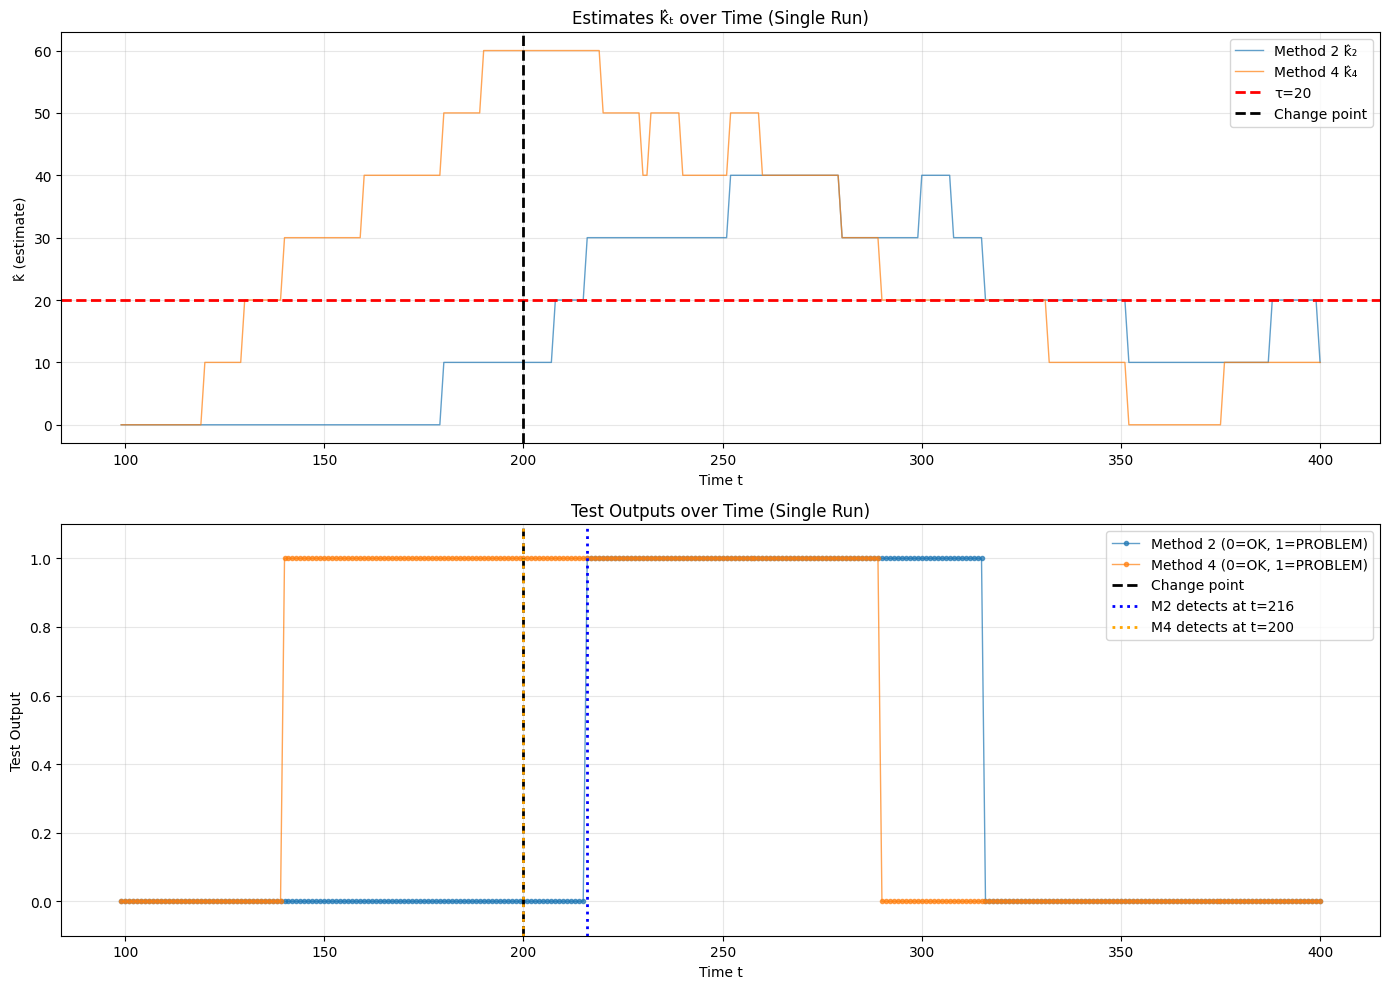

Method 2 detected at t=216
Method 4 detected at t=200


In [114]:
# PART 1: Single MC run visualization
print("Running single simulation for visualization...")
m2_time, m4_time, k2_est, k4_est, m2_flag, m4_flag = simulate_detection()

t_plot = sorted(k2_est.keys())
k2_vals = [k2_est[t] for t in t_plot]
k4_vals = [k4_est[t] for t in t_plot]
m2_vals = [m2_flag[t] for t in t_plot]
m4_vals = [m4_flag[t] for t in t_plot]

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot k̂ estimates
axes[0].plot(t_plot, k2_vals, label='Method 2 k̂₂', alpha=0.7, linewidth=1)
axes[0].plot(t_plot, k4_vals, label='Method 4 k̂₄', alpha=0.7, linewidth=1)
axes[0].axhline(y=tau, color='red', linestyle='--', label=f'τ={tau}', linewidth=2)
axes[0].axvline(x=200, color='black', linestyle='--', label='Change point', linewidth=2)
axes[0].set_xlabel('Time t')
axes[0].set_ylabel('k̂ (estimate)')
axes[0].set_title('Estimates k̂ₜ over Time (Single Run)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot test outputs (0=OK, 1=PROBLEM)
axes[1].plot(t_plot, m2_vals, label='Method 2 (0=OK, 1=PROBLEM)', alpha=0.7, linewidth=1, marker='.')
axes[1].plot(t_plot, m4_vals, label='Method 4 (0=OK, 1=PROBLEM)', alpha=0.7, linewidth=1, marker='.')
axes[1].axvline(x=200, color='black', linestyle='--', label='Change point', linewidth=2)
if m2_time is not None:
    axes[1].axvline(x=m2_time, color='blue', linestyle=':', label=f'M2 detects at t={m2_time}', linewidth=2)
if m4_time is not None:
    axes[1].axvline(x=m4_time, color='orange', linestyle=':', label=f'M4 detects at t={m4_time}', linewidth=2)
axes[1].set_xlabel('Time t')
axes[1].set_ylabel('Test Output')
axes[1].set_title('Test Outputs over Time (Single Run)')
axes[1].set_ylim(-0.1, 1.1)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Method 2 detected at t={m2_time}")
print(f"Method 4 detected at t={m4_time}")


Running Monte Carlo simulation...
Completed 500/2000 runs
Completed 1000/2000 runs
Completed 1500/2000 runs
Completed 2000/2000 runs


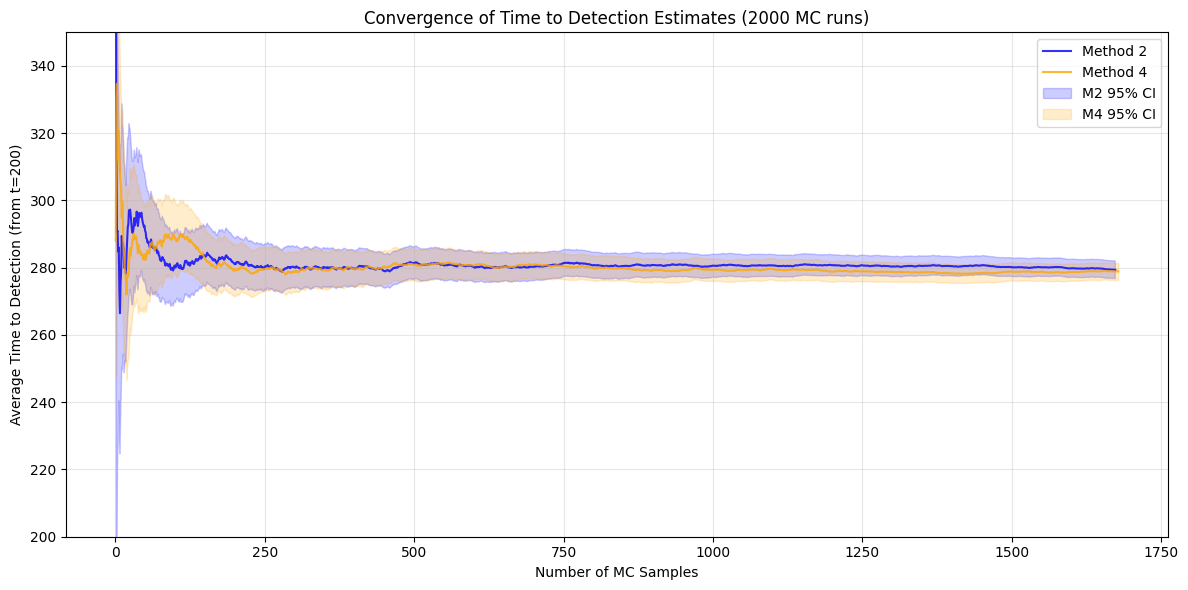


SUMMARY STATISTICS
Method 2:
  Average time to detection: 279.37
  95% CI: ±2.61
  Detection rate: 1673/2000 (83.7%)

Method 4:
  Average time to detection: 278.91
  95% CI: ±2.51
  Detection rate: 1678/2000 (83.9%)

Difference: 0.45 time units


In [118]:
# PART 2: Monte Carlo to estimate time to detection
print("\nRunning Monte Carlo simulation...")
mc_runs = 2000

m2_detection_times = []
m4_detection_times = []

for run in range(mc_runs):
    m2_t, m4_t, _, _, _, _ = simulate_detection()
    
    # Only include runs where detection actually occurred
    if m2_t is not None:
        m2_detection_times.append(m2_t)
    if m4_t is not None:
        m4_detection_times.append(m4_t)
    
    if (run + 1) % 500 == 0:
        print(f"Completed {run + 1}/{mc_runs} runs")

# Final estimates
m2_avg = np.mean(m2_detection_times) if m2_detection_times else None
m4_avg = np.mean(m4_detection_times) if m4_detection_times else None

# Calculate empirical variance and standard error for CI
m2_empirical_var = np.var(m2_detection_times, ddof=1) if len(m2_detection_times) > 1 else 0
m4_empirical_var = np.var(m4_detection_times, ddof=1) if len(m4_detection_times) > 1 else 0

m2_std_error = np.sqrt(m2_empirical_var / len(m2_detection_times)) if m2_detection_times else 0
m4_std_error = np.sqrt(m4_empirical_var / len(m4_detection_times)) if m4_detection_times else 0

m2_ci_final = 1.96 * m2_std_error
m4_ci_final = 1.96 * m4_std_error

# PLOT: Convergence of time to detection estimates with confidence intervals
plt.figure(figsize=(12, 6))

# Calculate cumulative averages and CIs at each iteration
m2_cumulative_avg = []
m4_cumulative_avg = []
m2_ci_lower = []
m2_ci_upper = []
m4_ci_lower = []
m4_ci_upper = []

for i in range(1, len(m2_detection_times) + 1):
    avg = np.mean(m2_detection_times[:i])
    m2_cumulative_avg.append(avg)
    
    if i > 1:
        empirical_var = np.var(m2_detection_times[:i], ddof=1)
        se = np.sqrt(empirical_var / i)
        ci = 1.96 * se
    else:
        ci = 0
    
    m2_ci_lower.append(avg - ci)
    m2_ci_upper.append(avg + ci)

for i in range(1, len(m4_detection_times) + 1):
    avg = np.mean(m4_detection_times[:i])
    m4_cumulative_avg.append(avg)
    
    if i > 1:
        empirical_var = np.var(m4_detection_times[:i], ddof=1)
        se = np.sqrt(empirical_var / i)
        ci = 1.96 * se
    else:
        ci = 0
    
    m4_ci_lower.append(avg - ci)
    m4_ci_upper.append(avg + ci)

# Plot cumulative averages
plt.plot(range(1, len(m2_cumulative_avg) + 1), m2_cumulative_avg, 
         label='Method 2', alpha=0.8, linewidth=1.5, color='blue')
plt.plot(range(1, len(m4_cumulative_avg) + 1), m4_cumulative_avg, 
         label='Method 4', alpha=0.8, linewidth=1.5, color='orange')

# Add confidence bands
plt.fill_between(range(1, len(m2_cumulative_avg) + 1), m2_ci_lower, m2_ci_upper,
                 alpha=0.2, color='blue', label='M2 95% CI')
plt.fill_between(range(1, len(m4_cumulative_avg) + 1), m4_ci_lower, m4_ci_upper,
                 alpha=0.2, color='orange', label='M4 95% CI')

plt.xlabel('Number of MC Samples')
plt.ylabel('Average Time to Detection (from t=200)')
plt.ylim(200, 350)
plt.title(f'Convergence of Time to Detection Estimates ({mc_runs} MC runs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Method 2:")
print(f"  Average time to detection: {m2_avg:.2f}")
print(f"  95% CI: ±{m2_ci_final:.2f}")
print(f"  Detection rate: {len(m2_detection_times)}/{mc_runs} ({100*len(m2_detection_times)/mc_runs:.1f}%)")
print(f"\nMethod 4:")
print(f"  Average time to detection: {m4_avg:.2f}")
print(f"  95% CI: ±{m4_ci_final:.2f}")
print(f"  Detection rate: {len(m4_detection_times)}/{mc_runs} ({100*len(m4_detection_times)/mc_runs:.1f}%)")
print(f"\nDifference: {abs(m2_avg - m4_avg):.2f} time units")
print("="*60)

The two methods in this experiment yield very comparable results, differing only slightly in time to detection. At first this seemed strange, but upon remembering that this case is the worst case scenario (even spacing), it is exactly the type of situation where we would expect method 4 to do worse than normal. It cannot rely on faults happening in blocks and aiming to catch one. This reiterates the behavior of problem 4 parts c and d, where the detection error of the two methods are very close as well, despite method 4 having lower variance as shown in the first parts.